<a id='top'></a>

# CSCI3022 F21
# Homework 2: Visualizing and Processing Data
***

**Name**: Nathan Shaver
***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 13 Sep**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline



[Back to top](#top)
<a/ id='p1'></a>

## (20 pts) Problem 1: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?


**Part A Solution:** Adding up each number will take n - 1 operations. For example:

1 + 2 + 3 + ... + n will take n - 1 operations.

It takes a single operation to divide the entire set by n. Added together, the total number of floating point operations is given by this equation:

(n - 1) + 1 = n

**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

**Part B Solution:** By retaining the total sum of the data set, it takes two operations to calculate the mean. One operation for adding a new number and another for dividing by the total set of numbers. As such, it takes n -2 operations to completely calculate the mean via streaming. This method is much more time costly.


We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after this problem, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [2]:
#Solution:

#function that return the mean of a list
def my_sample_mean(totalList):
    totalMean = sum(totalList) / len(totalList)
    return(totalMean)

#function that returns the variance of a list
def my_sample_var(totalListVar):
    total = 0
    i = 0
    totalMeanVar = my_sample_mean(totalListVar)
    for i in totalListVar:
        total = ((abs(i - totalMeanVar)) ** 2) + total
    finalVar = total / (len(totalListVar) - 1)
    return(finalVar)

**Part D**: Use your functions from Part C to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42,12,1]`

In [3]:
bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42,12,1]
print("The mean is: ", my_sample_mean(bus))
print("The variance is: ", my_sample_var(bus))

The mean is:  49.285714285714285
The variance is:  6488.681318681319


**Part E**: Implement a third function called `update_mean` that implements the formula discussed after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 12 estimates in `buffbus_bad_means`.

In [4]:
# Given API:
def update_mean(prev_mean, xn, n):
    new_mean = (((xn - prev_mean)/n) + prev_mean)
    return(new_mean)

previous = 0
buffbus_bad_means = np.array([])

#for loop that runs through each element in the bus
for y,x in enumerate(bus):
    values = update_mean(previous, x, y + 1)
    newArray = np.append(buffbus_bad_means, values)
    previous = values


To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [5]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in part E?  Is this truly better than the uninformed approach from part B?

**1F Solution:**

For each call of update_mean, a single addition, subtraction and division operation is performed. Update_mean is called for every element in the bus array. Therefore, the number of floating point operations spent were the length of the bus array * 3, or 3n. This is better effecincy wise then our solution in 1B.

**Part G:**
A similar result to the formula preceding part C holds for variance.  In particular, we can write that:

$$
\displaystyle s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} = \frac{1}{n(n-1)} \left(n \cdot \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2 \right)
$$

Describe in **words** and/or **psuedocode** how you might adapt the function you made in part **E** to perform running calculations of *both* variance and mean.  Be very clear as to what the input/instantiation arguments would be as well as what the output arguments would be in addition to any intermediate calculations.

**2G Solution:**

def mean(list, length):

    return (sum(list) / length)
    
def variance(list, length, mean):

    sum = []
    
    while i < length
    
        sum[i] = list[i] - mean
        
        sum[i] = sum[i] * sum[i]
        
    variance = sum(sum)/length
    
    return(variance)
    
def meanVariance(list):

    length = len(list)
    
    mean = mean(list, length)
    
    print variance(list, length, mean)


<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}



## (25 pts) Problem 2: Data (Grouping and Plotting)

The US Census Bureau is one of the largest data gathering organizations in the year.  They often have to analyze data involving the entire nation and describe it according to a variety of factors, including grouping by location (state, city, neighorhood), demographic factors, time, and more.  For this problem we have access to 10 years of state-wide reported unemployment data: for each of the reporting governments, we have 120 months of unemployment percentages.

Our goal is to explore this data and visualize it.

In [6]:
df=pd.read_csv('/home/jovyan/3022/hw/hw2/employment.csv', encoding='UTF-8')
dfstates=pd.read_csv('/home/jovyan/3022/hw/hw2/stategeocodes.csv', encoding='UTF-8')
df.head()

,Series ID,11-Jan,11-Feb,11-Mar,11-Apr,11-May,11-Jun,11-Jul,11-Aug,11-Sep,...,20-Mar,20-Apr,20-May,20-Jun,20-Jul,20-Aug,20-Sep,20-Oct,20-Nov,20-Dec
0,1,10.7,10.3,9.8,9.2,9.3,10.3,10.1,9.8,9.5,...,2.8,12.7,7.6,8.0,7.9,7.3,6.8,4.3,3.8,3.5
1,2,9.0,8.9,8.6,8.0,7.6,7.8,7.0,6.7,7.0,...,6.2,12.4,12.0,11.2,10.2,6.2,6.5,5.9,6.3,6.6
2,4,10.1,9.6,9.3,9.1,8.9,10.4,10.2,9.8,9.5,...,5.2,14.2,10.7,10.8,10.9,7.1,7.0,6.4,6.4,6.7
3,5,8.9,8.7,8.0,7.5,7.8,8.3,8.3,7.9,7.7,...,4.2,9.7,8.7,7.9,7.5,6.3,5.8,4.8,4.8,4.7
4,6,12.7,12.4,12.3,11.7,11.5,12.2,12.4,12.1,11.7,...,5.1,16.0,15.5,14.1,13.6,12.3,10.5,9.3,8.3,9.1


**Part A:**  Load in the data above from both `employment.csv` and `stategeocodes.csv` and make sure you understand the data's shape and form.  For each file, check out `pd.dtypes` then print out `pd.shape` and `pd.head`.  Is each field of the correct data type?  Do we have the expected number of rows for tracking all 50 states?


In [7]:
print (df.dtypes)
print (df.shape)
print (df.head())
print (dfstates.dtypes)
print (dfstates.shape)
print (dfstates.head())

Series ID      int64
11-Jan       float64
11-Feb       float64
11-Mar       float64
11-Apr       float64
              ...   
20-Aug       float64
20-Sep       float64
20-Oct       float64
20-Nov       float64
20-Dec       float64
Length: 121, dtype: object
(51, 121)
   Series ID  11-Jan  11-Feb  11-Mar  11-Apr  11-May  11-Jun  11-Jul  11-Aug  \
0          1    10.7    10.3     9.8     9.2     9.3    10.3    10.1     9.8   
1          2     9.0     8.9     8.6     8.0     7.6     7.8     7.0     6.7   
2          4    10.1     9.6     9.3     9.1     8.9    10.4    10.2     9.8   
3          5     8.9     8.7     8.0     7.5     7.8     8.3     8.3     7.9   
4          6    12.7    12.4    12.3    11.7    11.5    12.2    12.4    12.1   

   11-Sep  ...  20-Mar  20-Apr  20-May  20-Jun  20-Jul  20-Aug  20-Sep  \
0     9.5  ...     2.8    12.7     7.6     8.0     7.9     7.3     6.8   
1     7.0  ...     6.2    12.4    12.0    11.2    10.2     6.2     6.5   
2     9.5  ...     5.2    14.

**Part B:**  The official US census divides the US into 4 super-regions, [shown here](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf).  Add a column for `Region` and assign all of the regions to their correct region.  

Unfortunately, the data wasn't given with these regions, so we have to add them in using the second data file.  We also only have odd codes for each of the states, instead of their names!  Add both `"State"` and `"Region:` columns to the employment data frame with the actual state names and their region numbers or names. You can match IDs from `State (FIPS)` in the `stategeocodes.csv` to the `Series ID` from `employment.csv`.


In [8]:
#create empty columns
df['State'] = ""
df['Region'] = ""
length = len(df)

#for loop that populates those columns
for i in range(length):
    df["State"][i] = dfstates.loc[df["Series ID"][i] == dfstates["State (FIPS)"], "Name"].values[0]
    df["Region"][i] = dfstates.loc[df["Series ID"][i] == dfstates["State (FIPS)"], "Region"].values[0]
df.head()

/tmp/ipykernel_483/2055849298.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["State"][i] = dfstates.loc[df["Series ID"][i] == dfstates["State (FIPS)"], "Name"].values[0]
/tmp/ipykernel_483/2055849298.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Region"][i] = dfstates.loc[df["Series ID"][i] == dfstates["State (FIPS)"], "Region"].values[0]


,Series ID,11-Jan,11-Feb,11-Mar,11-Apr,11-May,11-Jun,11-Jul,11-Aug,11-Sep,...,20-May,20-Jun,20-Jul,20-Aug,20-Sep,20-Oct,20-Nov,20-Dec,State,Region
0,1,10.7,10.3,9.8,9.2,9.3,10.3,10.1,9.8,9.5,...,7.6,8.0,7.9,7.3,6.8,4.3,3.8,3.5,Alabama,3
1,2,9.0,8.9,8.6,8.0,7.6,7.8,7.0,6.7,7.0,...,12.0,11.2,10.2,6.2,6.5,5.9,6.3,6.6,Alaska,4
2,4,10.1,9.6,9.3,9.1,8.9,10.4,10.2,9.8,9.5,...,10.7,10.8,10.9,7.1,7.0,6.4,6.4,6.7,Arizona,4
3,5,8.9,8.7,8.0,7.5,7.8,8.3,8.3,7.9,7.7,...,8.7,7.9,7.5,6.3,5.8,4.8,4.8,4.7,Arkansas,3
4,6,12.7,12.4,12.3,11.7,11.5,12.2,12.4,12.1,11.7,...,15.5,14.1,13.6,12.3,10.5,9.3,8.3,9.1,California,4


**Part C:**

As a sanity check, loop over all the unique regions you've created and print out how many rows of your data frame are in that region.  You should find:

1) 9 in the Northeast

2) 12 in the Midwest

3) 17 in the South

4) 13 in the West

In [9]:
i = 0
NorthEast = 0
MidWest = 0
South = 0
West = 0

#while loop that checks each row what region it has
while i < len(df):
    if(df["Region"][i] == 1):
        NorthEast = NorthEast + 1
    elif(df["Region"][i] == 2):
        MidWest = MidWest + 1
    elif(df["Region"][i] == 3):
        South = South + 1
    elif(df["Region"][i] == 4):
        West = West + 1
    i=i+1
    
print(NorthEast, "in the NorthEast")
print(MidWest, "in the Midwest")
print(South, "in the South")
print(West, "in the West")

9 in the NorthEast
12 in the Midwest
17 in the South
13 in the West


**Part D:** Create a histogram of the entire data frame.  Describe it's general shape (skewness or symmetry) and whether or not it has any outliers.

(Check out `np.reshape` for a nice way to turn a large matrix/array into something 1-dimensional, for easier plotting!)

/tmp/ipykernel_483/2561872045.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfHist = df.drop(["State", "Region"], 1)


Text(0, 0.5, 'Quantity of Unemployment Percentages')

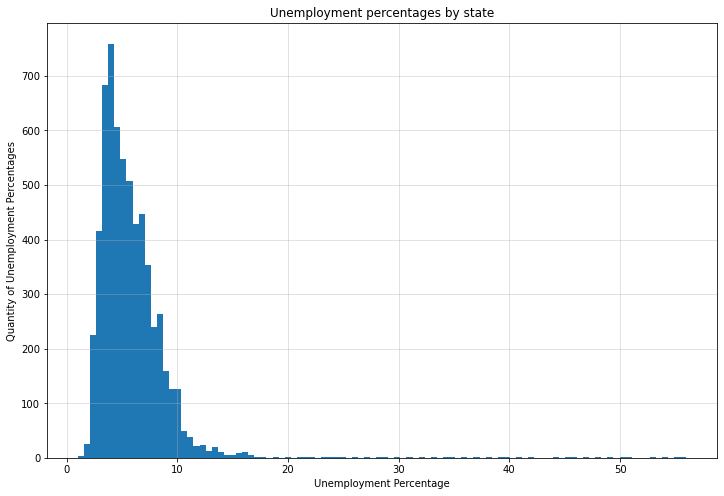

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#new histogram with dropped state and region columns. formed into an array and reshaped
dfHist = df.drop(["State", "Region"], 1)
dfHist = np.array(dfHist)
dfHist = dfHist.reshape(-1)

fig, ax = plt.subplots(1,1, figsize = (12,8))
#plotting histogram
ax.hist(dfHist, bins = 100, density = False)
ax.set_title("Unemployment percentages by state")
ax.set_xlabel("Unemployment Percentage")
ax.grid(alpha=.45)
ax.set_ylabel("Quantity of Unemployment Percentages")

The graph appears to have a mostly normal distribution centered around an unemployment rate of 5%. There is a general right skewness, with sevearal significant datapoints settled inbetween 10-20%. There are also many single point outliers that extend past 20%.

**Part E:** Create a single figure with a series of box plots (4 side-by-side boxes) of the employment data grouped by each region.

/tmp/ipykernel_483/1820191072.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfWest = dfWest.drop(["Series ID", "Region", "State"], 1)
/tmp/ipykernel_483/1820191072.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfNorthEast = dfNorthEast.drop(["Series ID", "Region", "State"], 1)
/tmp/ipykernel_483/1820191072.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfSouth = dfSouth.drop(["Series ID", "Region", "State"], 1)
/tmp/ipykernel_483/1820191072.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfMidWest = dfMidWest.drop(["Series ID", "Region", "State"], 1)


([<matplotlib.axis.XTick at 0x7f21f16f2340>,
 [Text(1, 0, 'Northeast'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'South'),
  Text(4, 0, 'West')])

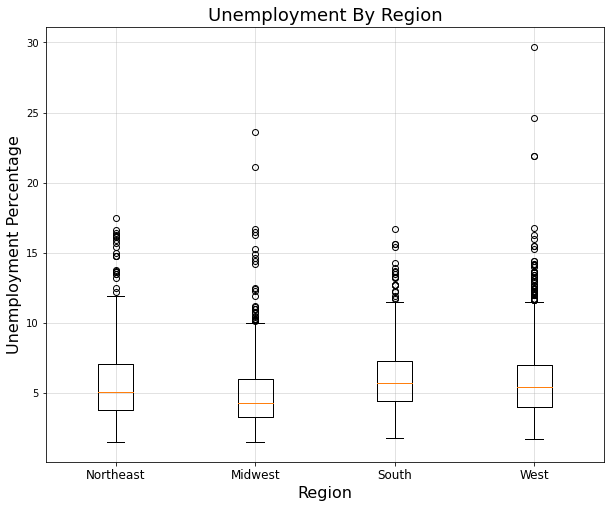

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
#new dataframes that only contains rows from that region
dfNorthEast = df[(df['Region'] == 1)]
dfMidWest = df[(df['Region'] == 2)]
dfSouth = df[(df['Region'] == 3)]
dfWest = df[(df['Region'] == 4)]

#dataframe is dropped of uncessary columns, turned into an array and reshaped
dfWest = dfWest.drop(["Series ID", "Region", "State"], 1)
dfWest = np.array(dfWest)
dfWest = dfWest.reshape(-1)

#dataframe is dropped of uncessary columns, turned into an array and reshaped
dfNorthEast = dfNorthEast.drop(["Series ID", "Region", "State"], 1)
dfNorthEast = np.array(dfNorthEast)
dfNorthEast = dfNorthEast.reshape(-1)

#dataframe is dropped of uncessary columns, turned into an array and reshaped
dfSouth = dfSouth.drop(["Series ID", "Region", "State"], 1)
dfSouth = np.array(dfSouth)
dfSouth = dfSouth.reshape(-1)

#dataframe is dropped of uncessary columns, turned into an array and reshaped
dfMidWest = dfMidWest.drop(["Series ID", "Region", "State"], 1)
dfMidWest = np.array(dfMidWest)
dfMidWest = dfMidWest.reshape(-1)

#boxplot is plotted with each parameter
boxplot = ax.boxplot([dfNorthEast, dfMidWest, dfSouth, dfWest], widths = [.25,.25,.25,.25])
ax.set_title('Unemployment By Region', fontsize=18)
ax.set_ylabel("Unemployment Percentage", fontsize=16)
ax.set_xlabel("Region", fontsize=16)
ax.grid(alpha=.45);
plt.xticks([1,2,3,4],["Northeast", "Midwest","South","West"], fontsize=12)

**Part F:** Create a new data frame with 12 columns that groups all of the data according to month of the year.  You can combine all the locations into a single column for each month.  

(*Hint*: Every 12th data column should be from the same month.)

Then create a single figure with a series of box plots (12 side-by-side boxes) of the employment data grouped by each month.


([<matplotlib.axis.XTick at 0x7f21f17d3e50>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

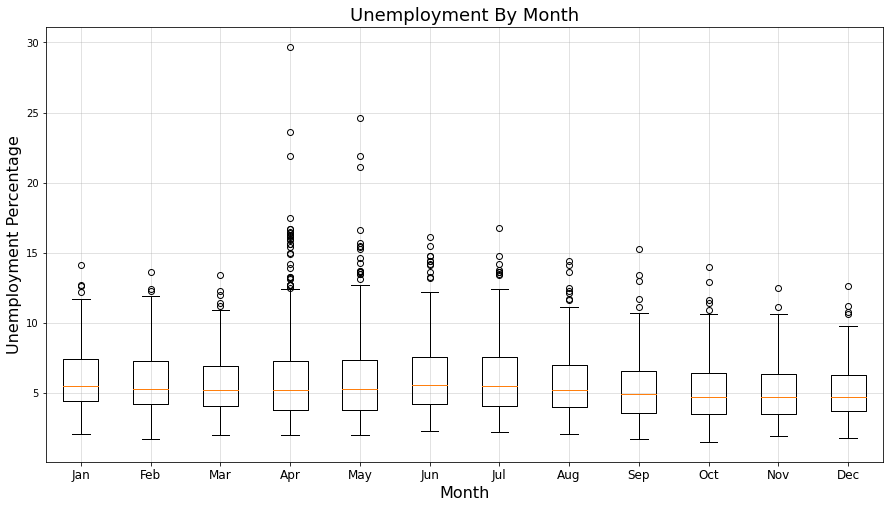

In [12]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfJan = df[['11-Jan','12-Jan','13-Jan','14-Jan','15-Jan','16-Jan','17-Jan','18-Jan','19-Jan','20-Jan',]]
dfJan = np.array(dfJan)
dfJan = dfJan.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfFeb = df[['11-Feb','12-Feb','13-Feb','14-Feb','15-Feb','16-Feb','17-Feb','18-Feb','19-Feb','20-Feb',]]
dfFeb = np.array(dfFeb)
dfFeb= dfFeb.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfMar = df[['11-Mar','12-Mar','13-Mar','14-Mar','15-Mar','16-Mar','17-Mar','18-Mar','19-Mar','20-Mar',]]
dfMar = np.array(dfMar)
dfMar = dfMar.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfApr = df[['11-Apr','12-Apr','13-Apr','14-Apr','15-Apr','16-Apr','17-Apr','18-Apr','19-Apr','20-Apr',]]
dfApr = np.array(dfApr)
dfApr= dfApr.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfMay = df[['11-May','12-May','13-May','14-May','15-May','16-May','17-May','18-May','19-May','20-May',]]
dfMay = np.array(dfMay)
dfMay = dfMay.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfJun = df[['11-Jun','12-Jun','13-Jun','14-Jun','15-Jun','16-Jun','17-Jun','18-Jun','19-Jun','20-Jun',]]
dfJun = np.array(dfJun)
dfJun= dfJun.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfJul = df[['11-Jul','12-Jul','13-Jul','14-Jul','15-Jul','16-Jul','17-Jul','18-Jul','19-Jul','20-Jul',]]
dfJul = np.array(dfJul)
dfJul = dfJul.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfAug = df[['11-Aug','12-Aug','13-Aug','14-Aug','15-Aug','16-Aug','17-Aug','18-Aug','19-Aug','20-Aug',]]
dfAug = np.array(dfAug)
dfAug= dfAug.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfSep = df[['11-Sep','12-Sep','13-Sep','14-Sep','15-Sep','16-Sep','17-Sep','18-Sep','19-Sep','20-Sep',]]
dfSep = np.array(dfSep)
dfSep = dfSep.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfOct = df[['11-Oct','12-Oct','13-Oct','14-Oct','15-Oct','16-Oct','17-Oct','18-Oct','19-Oct','20-Oct',]]
dfOct = np.array(dfOct)
dfOct= dfOct.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfNov = df[['11-Nov','12-Nov','13-Nov','14-Nov','15-Nov','16-Nov','17-Nov','18-Nov','19-Nov','20-Nov',]]
dfNov = np.array(dfNov)
dfNov = dfNov.reshape(-1)

#new dataframe is made with only columns from that month. it is then turned into an array and reshaped
dfDec = df[['11-Dec','12-Dec','13-Dec','14-Dec','15-Dec','16-Dec','17-Dec','18-Dec','19-Dec','20-Dec',]]
dfDec = np.array(dfDec)
dfDec= dfDec.reshape(-1)

#dataframes are plotted onto a single plot
bp = ax.boxplot([dfJan,dfFeb,dfMar,dfApr,dfMay,dfJun,dfJul,dfAug,dfSep,dfOct,dfNov,dfDec])

ax.set_title('Unemployment By Month', fontsize=18)
ax.set_ylabel("Unemployment Percentage", fontsize=16)
ax.set_xlabel("Month", fontsize=16)
ax.grid(alpha=.45);
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],["Jan", "Feb","Mar","Apr","May","Jun","Jul","Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=12)

**Part G:** Discuss the following:

1) Does there appear to be larger differences between different *regions* or between different *months*?  Explain fully.  Speculate as to *why* one factor might matter more than the other.

2) Are there any downsides to these kinds of groupings?  Can you think of anything that might make these types of comparisons more useful?


**2G Solution:**

1) The unemployment rate between regions does not appear to differ that much. The west has a few outliers that skew the graph, but for the most part, the means, quartiles and mins/maxes of the regions are roughly equal. This is likely due to most of the country experiencing equal levels of unemployment, with no state getting left behind. As for the months, the most notable difference are the outliers in April and May. This is likely attributed to the COVID-19 Pandemic when many people were layed off work. Otherwise, there is little difference overall between months, the means, quartiles and min/maxes are roughly equal. 

2) The downside to this kind of data is that major events like the pandemic layoff are presented as outliers. In reality, these were major events that have a significant impact on the data, and shouldn't be labeled as an outlier. These comparisons might better be displayed as a histogram, where clustered data can be visualized more clearly.
